In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

2022-12-02 20:53:54.476689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Import data 

In [4]:
df_southwest = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_southwest_clean.xlsx')

In [5]:
df_southwest = df_southwest.set_index(['date'])

In [6]:
X = df_southwest[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [7]:
y = df_southwest['pax_count'].values

## Train & test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Normalize the data

In [9]:
scaler = MinMaxScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

## Creating the model 

In [27]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                #kernel_initializer=initializers.RandomNormal(stddev=0.01),
               # bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [28]:
opt = keras.optimizers.Adam(learning_rate=0.2, beta_1=0.5, beta_2=0.999)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [29]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 1s 44ms/step - loss: 9800355.0000 - val_loss: 9744503.0000
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 9536450.0000 - val_loss: 5758340.5000
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 3768632.2500 - val_loss: 473035.3750
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 1229021.0000 - val_loss: 1993519.3750
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1178449.0000 - val_loss: 369411.7500
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 633949.8125 - val_loss: 742150.3750
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 753351.0000 - val_loss: 1941173.8750
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 1371522.5000 - val_loss: 2042674.3750
Epoch 9/50
6/6 [==============================] - 0s 12ms/step - loss: 1106834.2500 - val_loss: 559138.1250
Epoch 10/50
6/6 [========

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,loss,val_loss
0,9800355.00,9744503.000
1,9536450.00,5758340.500
2,3768632.25,473035.375
3,1229021.00,1993519.375
4,1178449.00,369411.750


<AxesSubplot:>

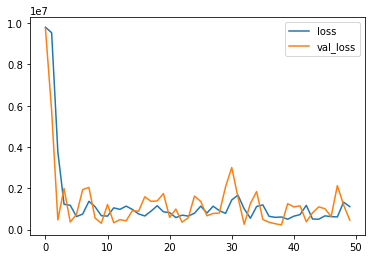

In [32]:
losses.plot()

In [33]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [34]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 8)                 40        
                                                                 
 dense_13 (Dense)            (None, 6)                 54        
                                                                 
 dense_14 (Dense)            (None, 5)                 35        
                                                                 
 dense_15 (Dense)            (None, 3)                 18        
                                                                 
 dense_16 (Dense)            (None, 2)                 8         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [35]:
testScore = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 538309.13 RMSE


In [36]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 538309.13 RMSE


In [37]:
def plot_delta(actual, predictions):
    title = 'Passanger Predictions Store '
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

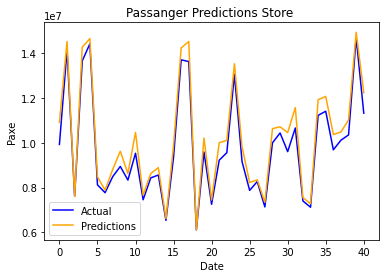

In [38]:
plot_delta(y_test, testPredict)